## 1. [决策树](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

max_depth_values = [2, 3, 4]

for max_depth_val in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth_val)
    dt_model.fit(X_train, y_train)
    
    print('max_depth=', max_depth_val)
    print('训练集上的准确率: {:.3f}'.format(dt_model.score(X_train, y_train)))
    print('测试集的准确率: {:.3f}'.format(dt_model.score(X_test, y_test)))
    print()

max_depth= 2
训练集上的准确率: 0.964
测试集的准确率: 0.895

max_depth= 3
训练集上的准确率: 0.982
测试集的准确率: 0.974

max_depth= 4
训练集上的准确率: 1.000
测试集的准确率: 0.974



### 决策树结果可视化：
需要安装:
* **graphviz程序**(已提供在代码目录下)，并将安装目录下的bin目录添加到环境变量中，**重启jupyter或系统生效**。如：C:\Program Files (x86)\Graphviz2.38\bin 添加到系统PATH环境变量中。
  
* **graphviz模块**, pip install graphviz

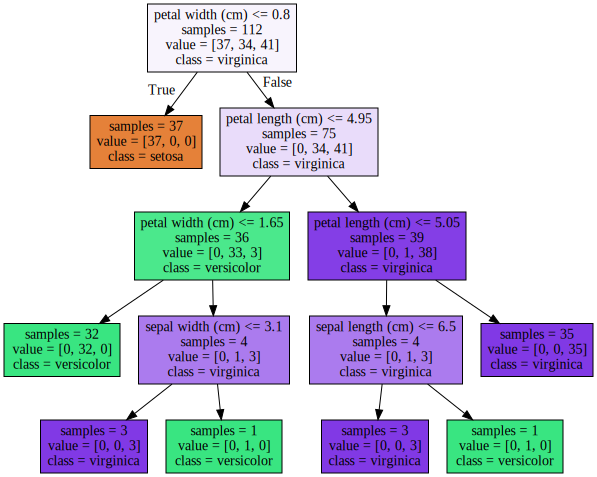

In [2]:
from ml_visualization import plot_decision_tree

dt_model = DecisionTreeClassifier(max_depth=4)
dt_model.fit(X_train, y_train)
plot_decision_tree(dt_model, iris.feature_names, iris.target_names)

In [3]:
print(iris.feature_names)
print(dt_model.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.02014872 0.02014872 0.40530263 0.55439994]


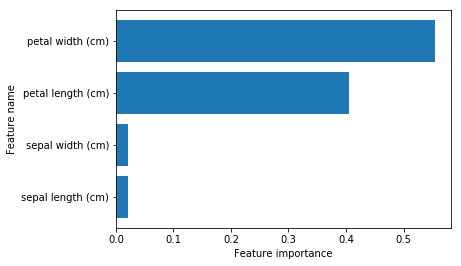

In [5]:
from ml_visualization import plot_feature_importances
%matplotlib inline
plot_feature_importances(dt_model, iris.feature_names)

## 2. [SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

C=0.0001，准确率：0.733


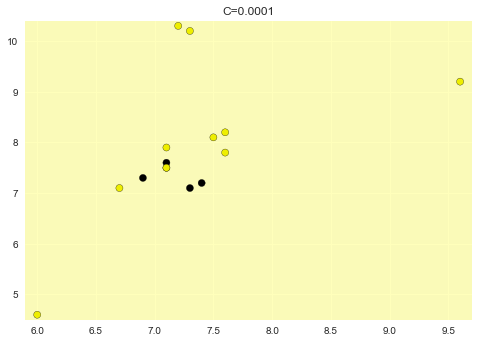

C=1，准确率：0.600


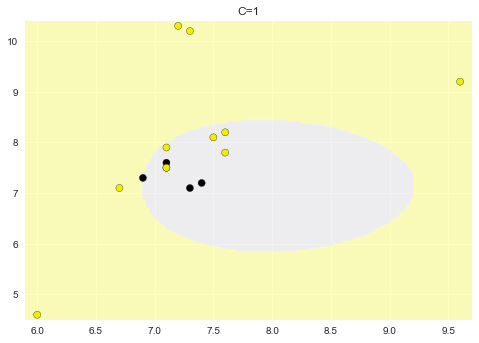

C=10000，准确率：0.533


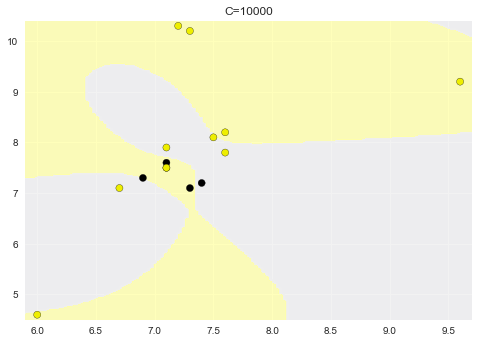

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from ml_visualization import plot_class_regions_for_classifier

# 加载数据集
fruits_df = pd.read_table('fruit_data_with_colors.txt')

X = fruits_df[['width', 'height']]
y = fruits_df['fruit_label'].copy()

# 将不是apple的标签设为0
y[y != 1] = 0
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# 不同的C值
c_values = [0.0001, 1, 10000]

for c_value in c_values:
    # 建立模型
    svm_model = SVC(C=c_value, kernel='rbf')

    # 训练模型
    svm_model.fit(X_train, y_train)

    # 验证模型
    y_pred = svm_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print('C={}，准确率：{:.3f}'.format(c_value, acc))
    
     # 可视化
    plot_class_regions_for_classifier(svm_model, X_test.values, y_test.values, title='C={}'.format(c_value))